In [1]:
#importing libary

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report,plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:/SUMIT/Assignments/Projects/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### No null values

In [7]:
df.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [8]:
df.describe(include='object').T

count unique                     top  freq
Attrition       1470      2                      No  1233
BusinessTravel  1470      3           Travel_Rarely  1043
Department      1470      3  Research & Development   961
EducationField  1470      6           Life Sciences   606
Gender          1470      2                    Male   882
JobRole         1470      9         Sales Executive   326
MaritalStatus   1470      3                 Married   673
Over18          1470      1                       Y  1470
OverTime        1470      2                      No  1054

# EDA

### Categorical column analysis

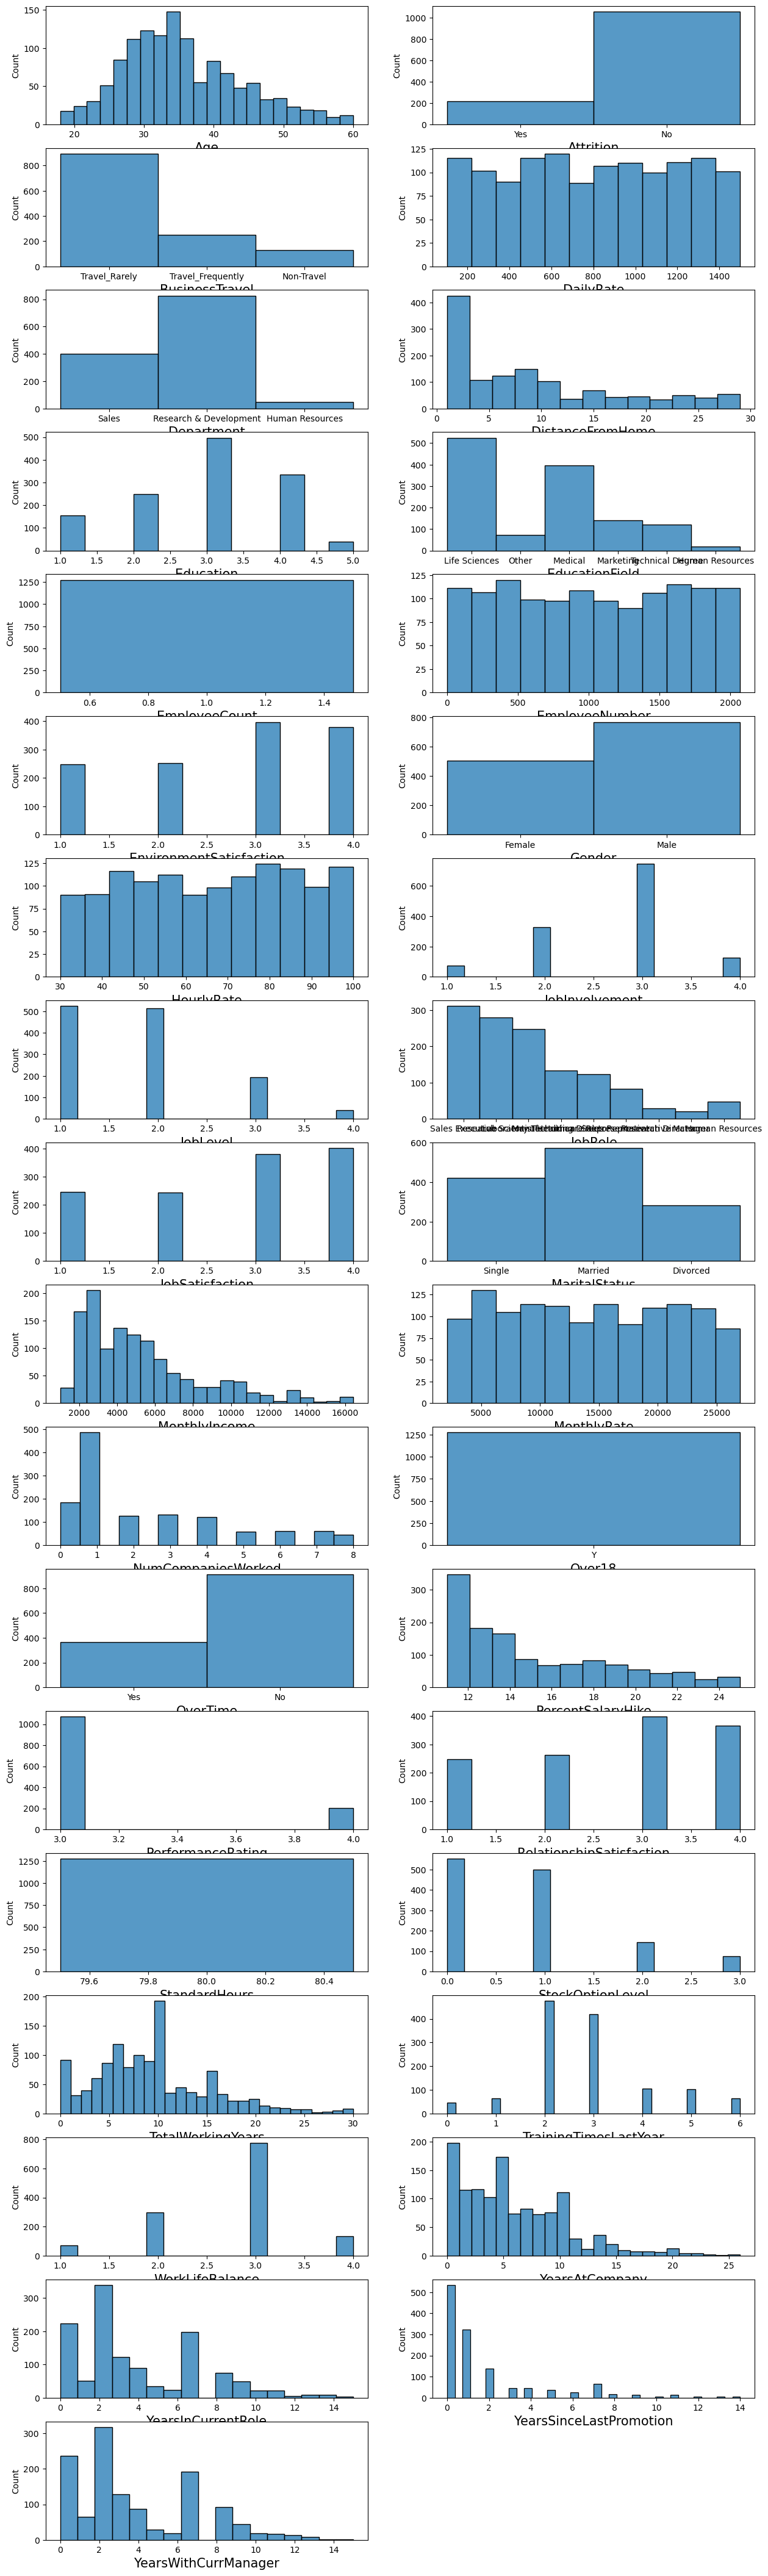

In [84]:
plt.figure(figsize=(15,60))
plotnumber =1

for column in df:
    if plotnumber<=40:
        ax = plt.subplot(20,2,plotnumber)
        sns.histplot(x=df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [9]:
obj_cols= df.select_dtypes(['object']).columns.drop('Attrition')
obj_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

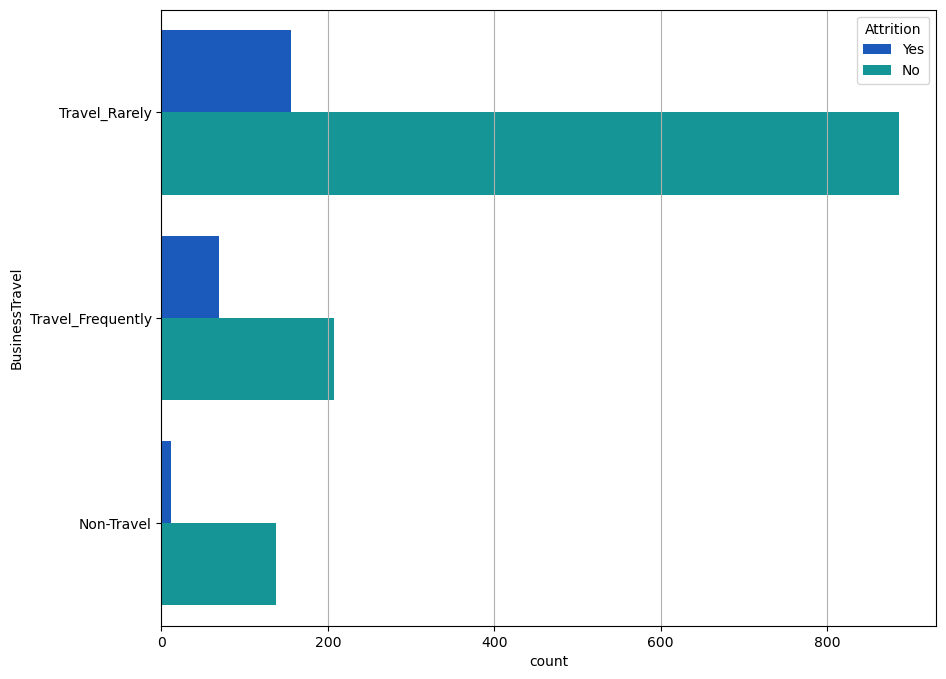

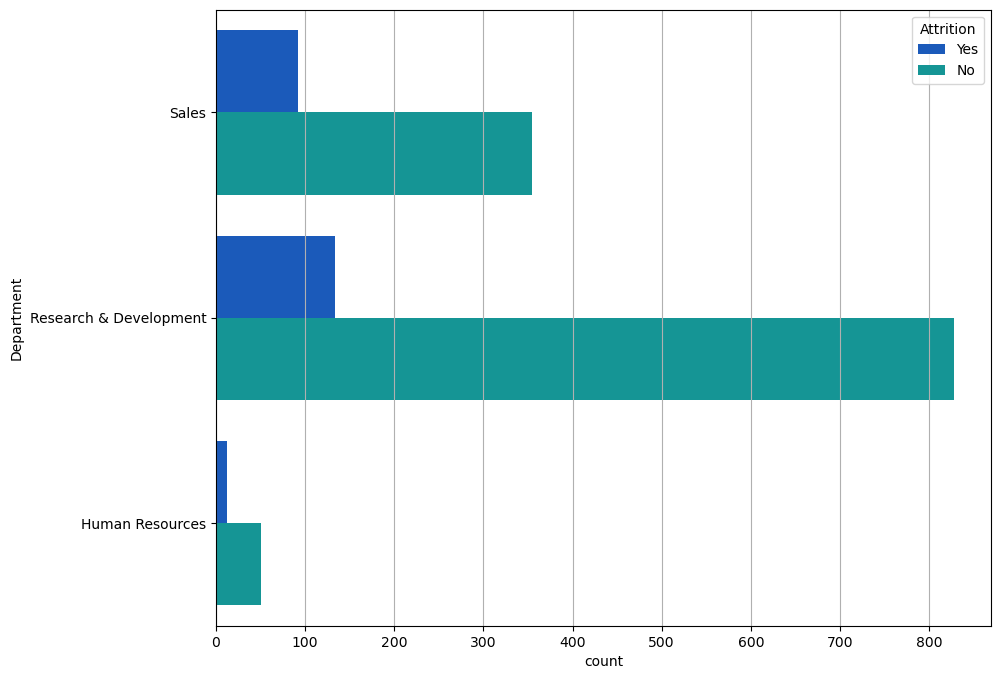

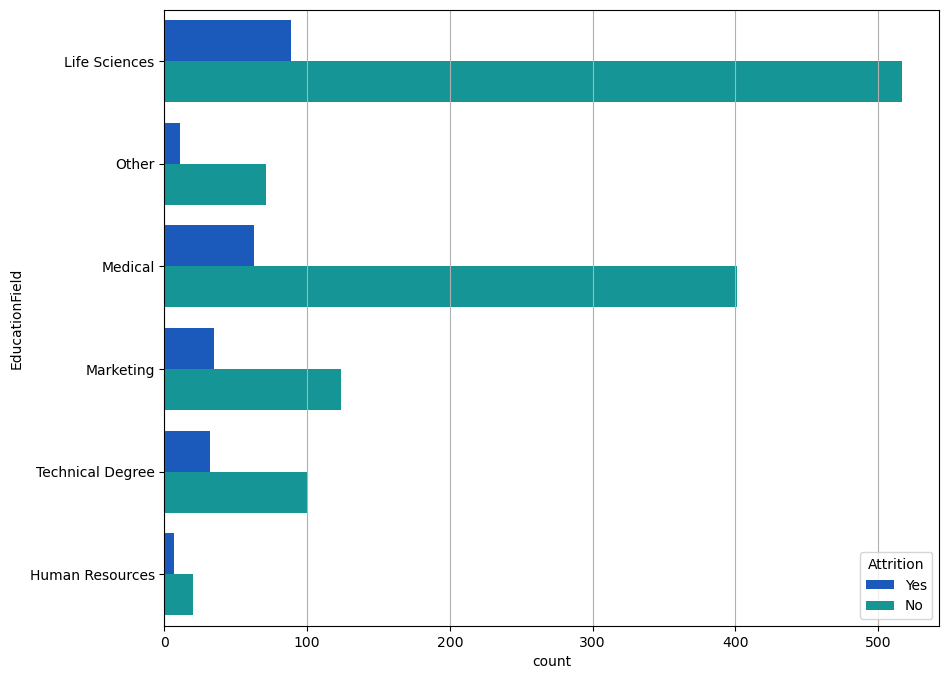

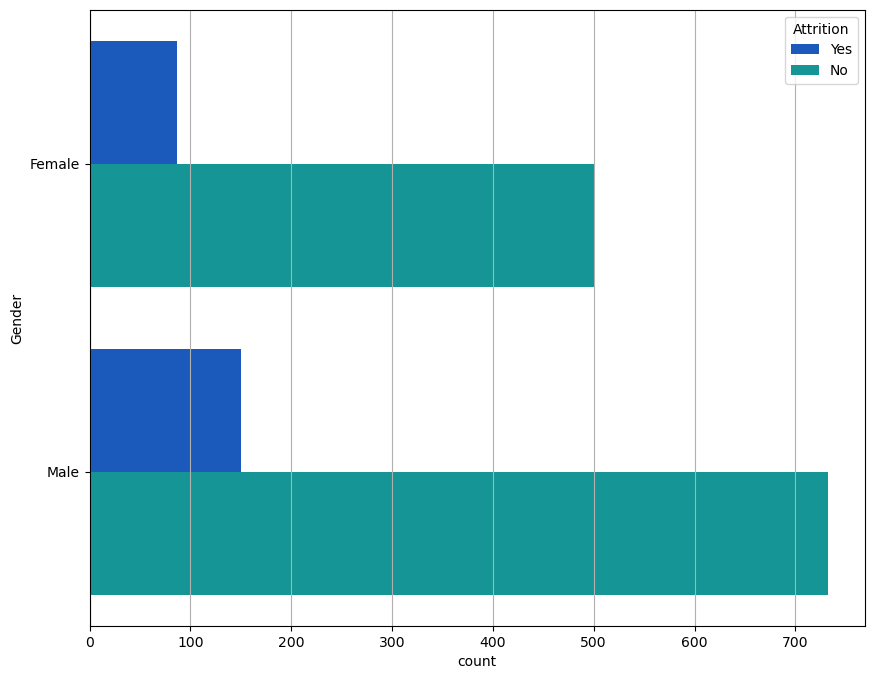

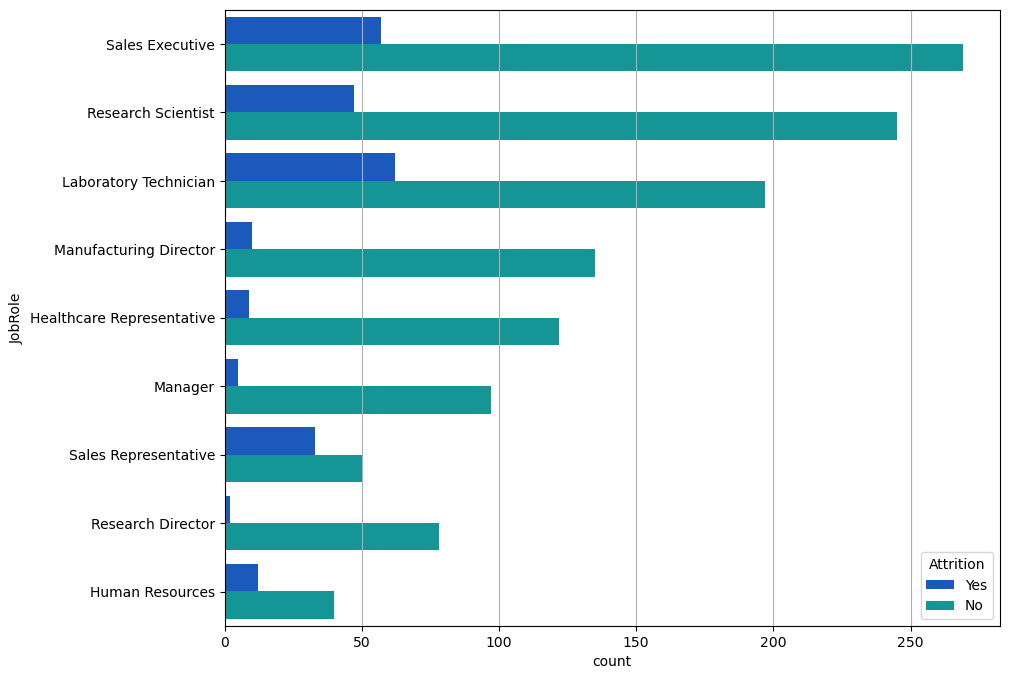

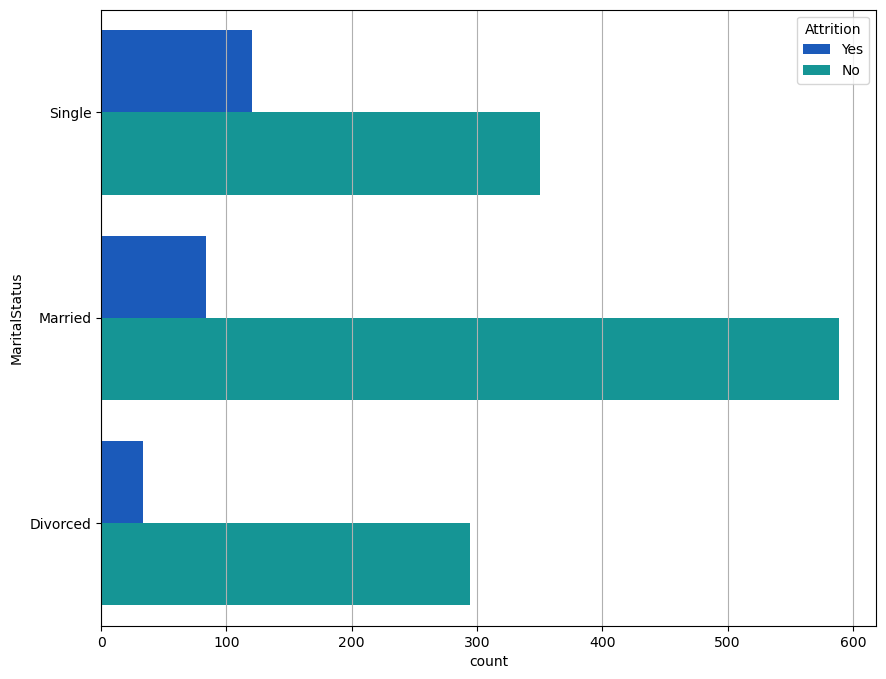

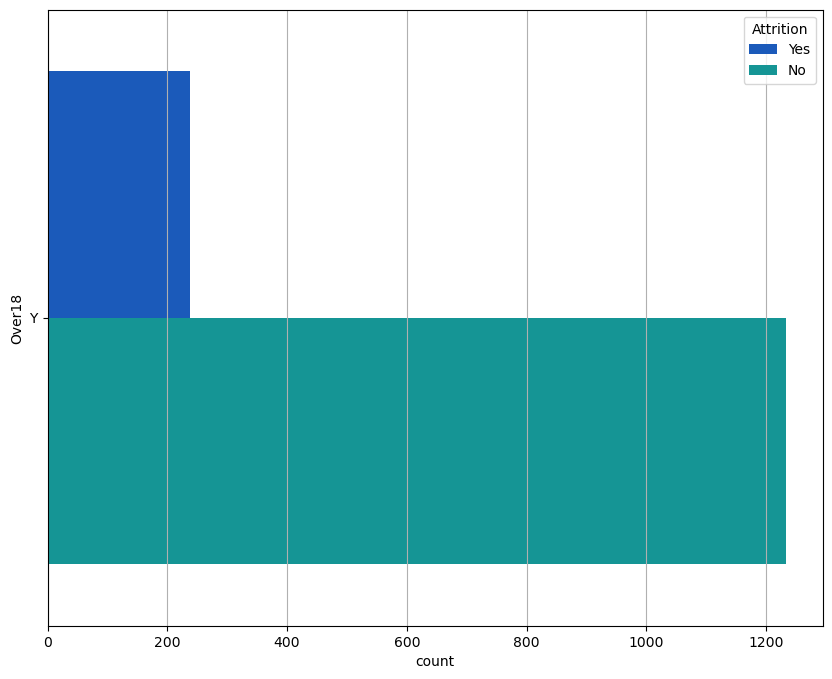

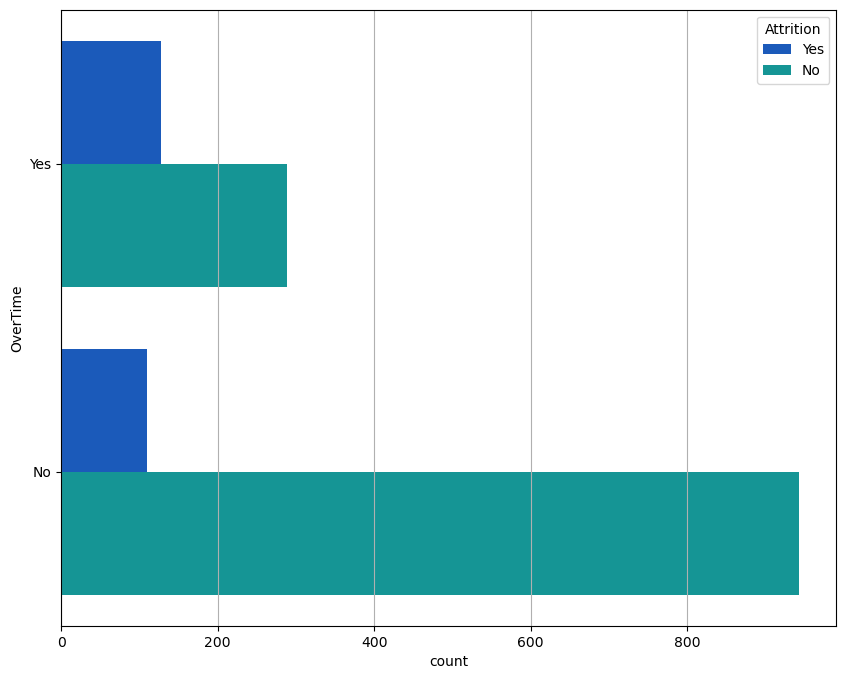

In [17]:
for col in obj_cols:
    plt.figure(figsize=(10,8))
    plt.grid(True)
    sns.countplot(y= col, data=df,palette='winter', hue='Attrition')
    plt.show()

### Majority of the people or High Attrition rate:-
    -Travel_Rarely
    -Research and Development Department
    -Life science, Medical
    -Male
    -Sales Executive, Research Scientist, Laboratory Technician
    -Married MaritalStatus
    -over18
    -No OverTime

### Numerical column Analysis

In [18]:
num_cols= df.select_dtypes(['int']).columns
num_cols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<Figure size 1800x600 with 0 Axes>

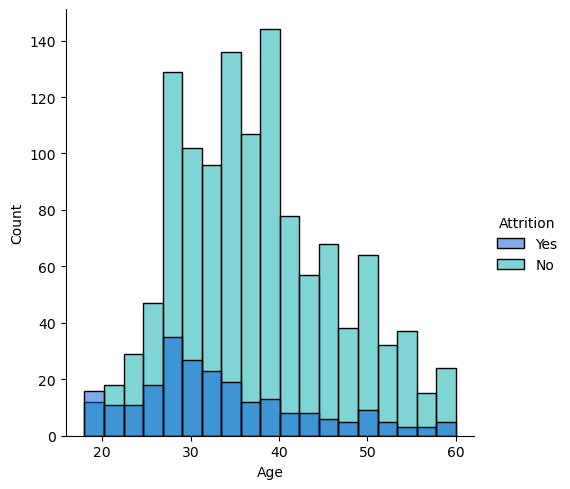

<Figure size 1800x600 with 0 Axes>

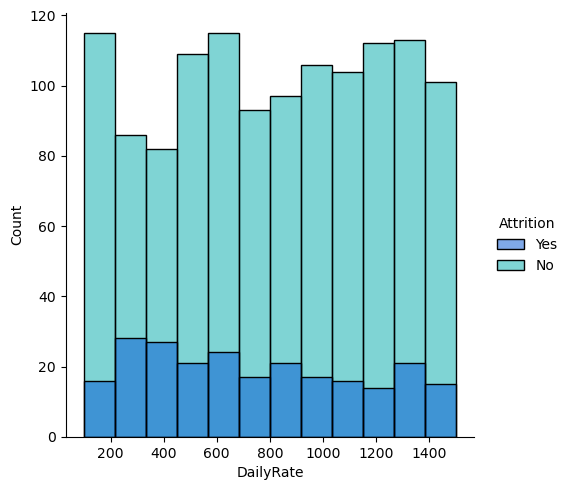

<Figure size 1800x600 with 0 Axes>

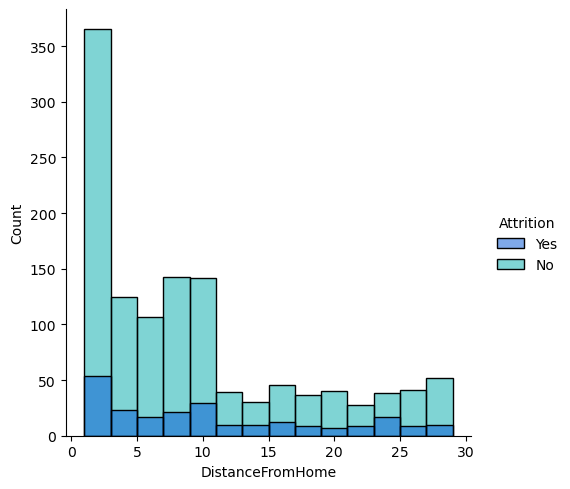

<Figure size 1800x600 with 0 Axes>

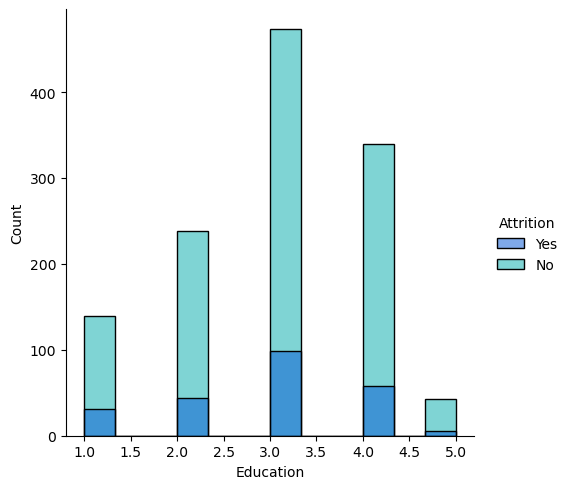

<Figure size 1800x600 with 0 Axes>

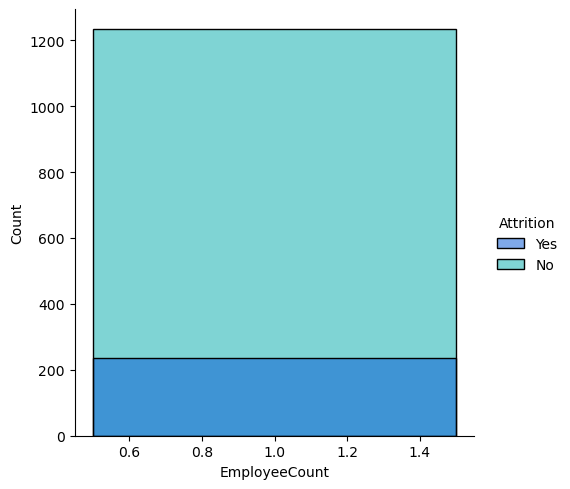

<Figure size 1800x600 with 0 Axes>

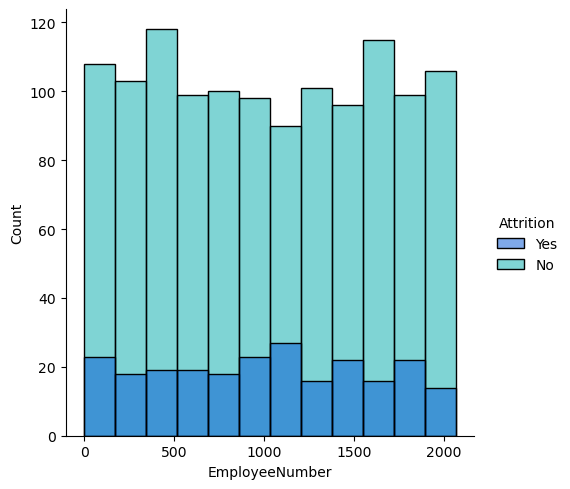

<Figure size 1800x600 with 0 Axes>

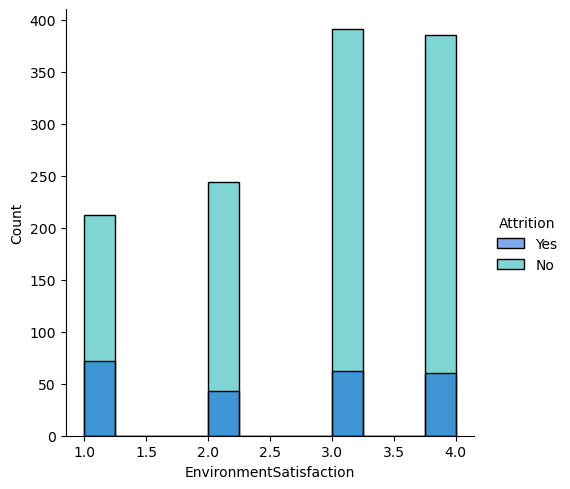

<Figure size 1800x600 with 0 Axes>

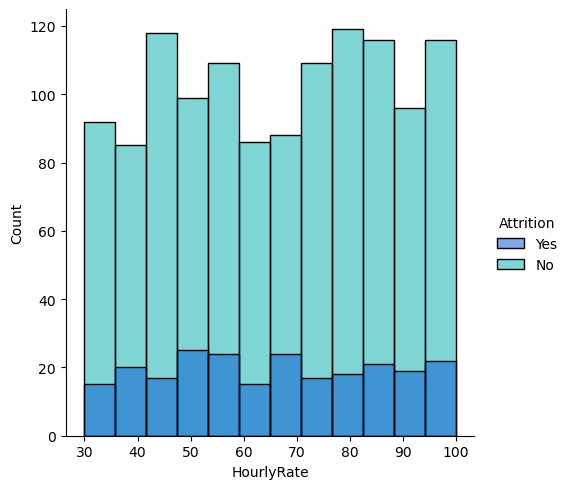

<Figure size 1800x600 with 0 Axes>

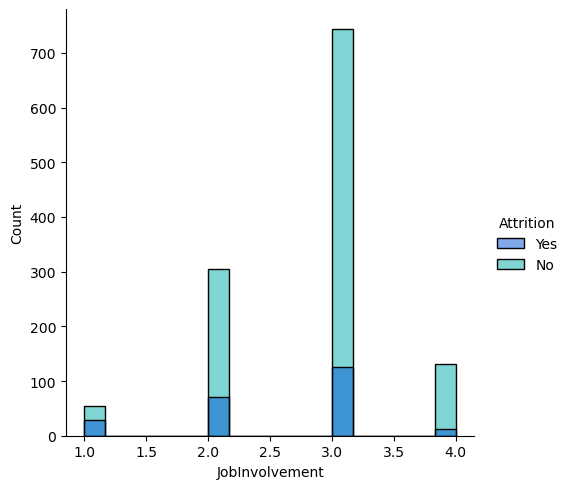

<Figure size 1800x600 with 0 Axes>

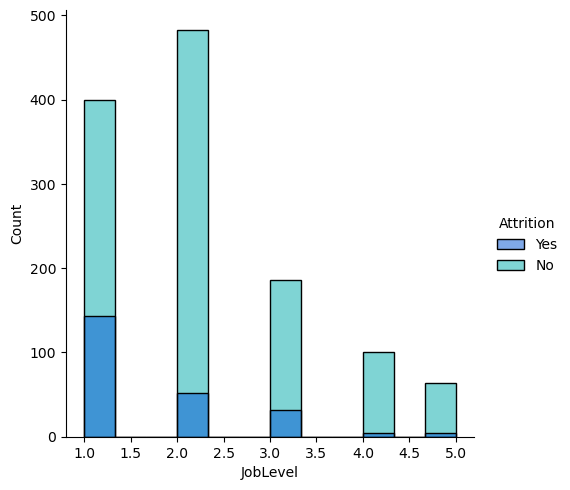

<Figure size 1800x600 with 0 Axes>

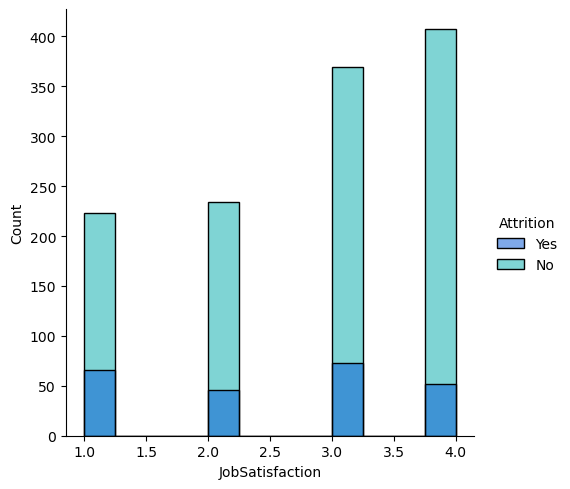

<Figure size 1800x600 with 0 Axes>

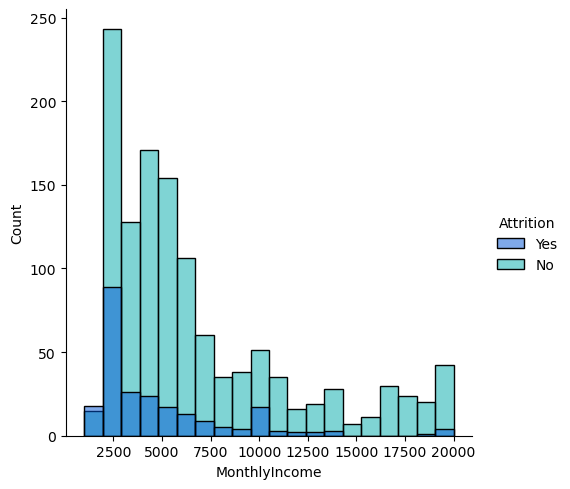

<Figure size 1800x600 with 0 Axes>

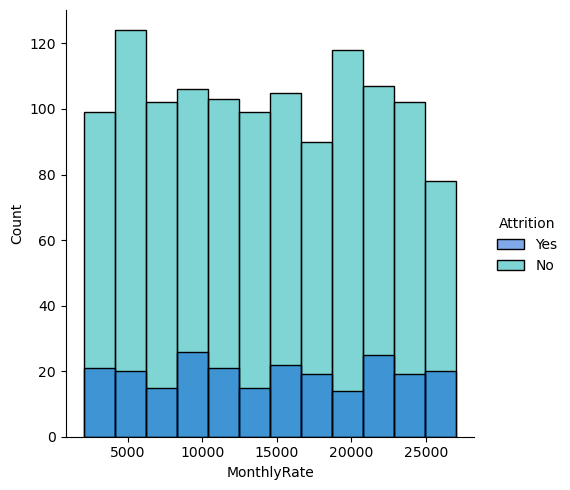

<Figure size 1800x600 with 0 Axes>

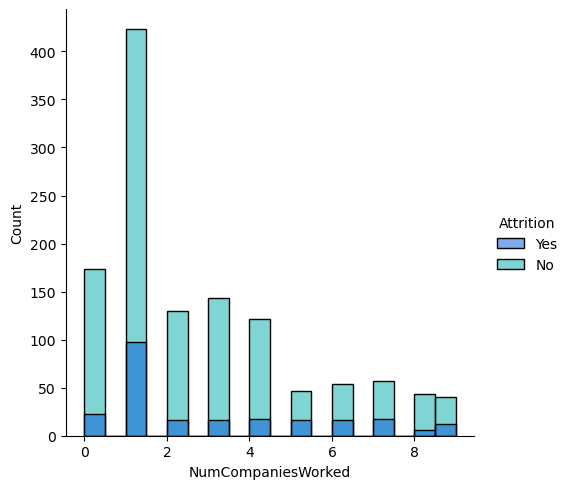

<Figure size 1800x600 with 0 Axes>

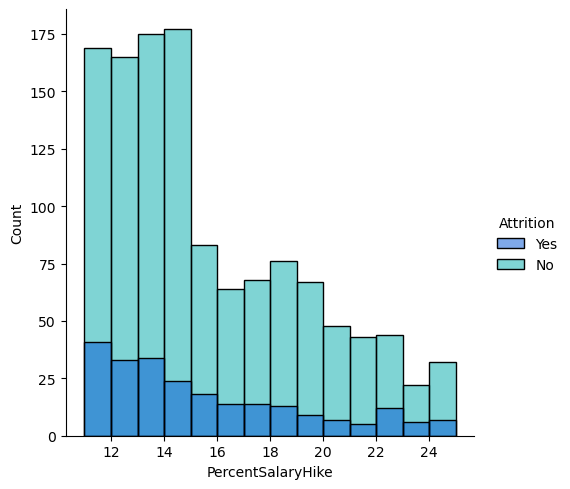

<Figure size 1800x600 with 0 Axes>

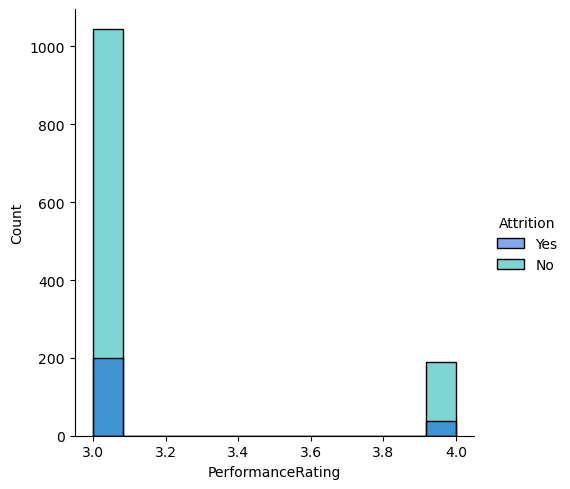

<Figure size 1800x600 with 0 Axes>

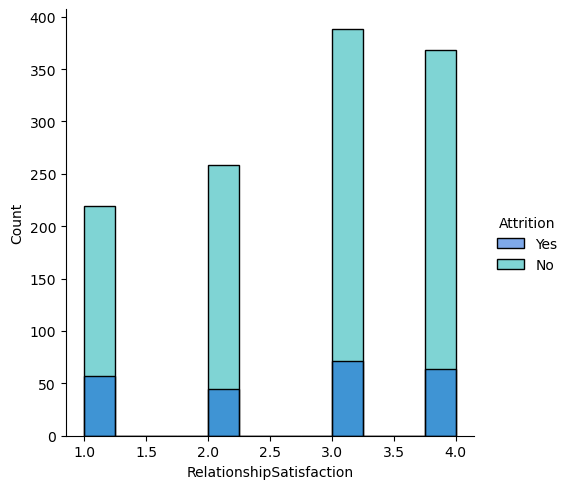

<Figure size 1800x600 with 0 Axes>

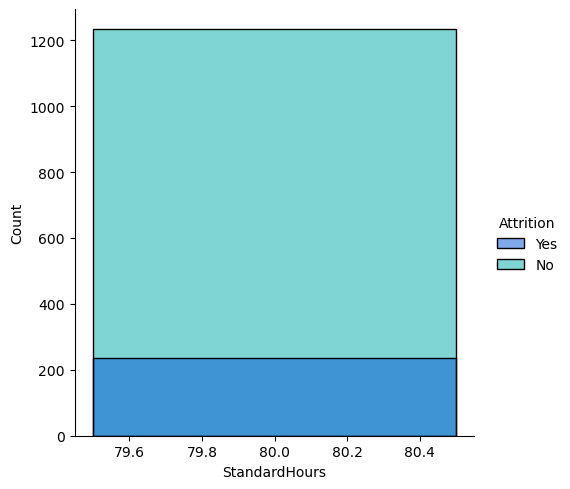

<Figure size 1800x600 with 0 Axes>

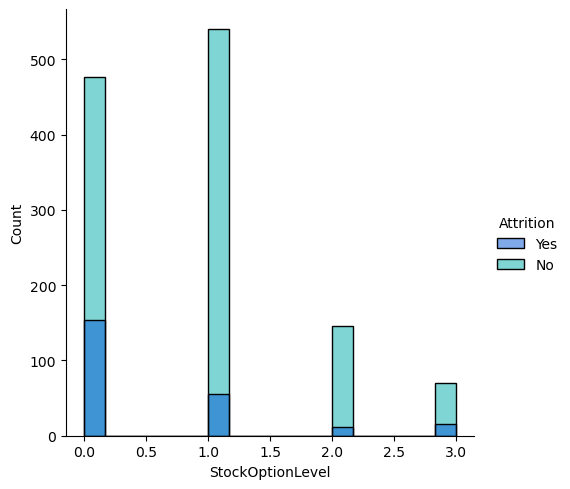

<Figure size 1800x600 with 0 Axes>

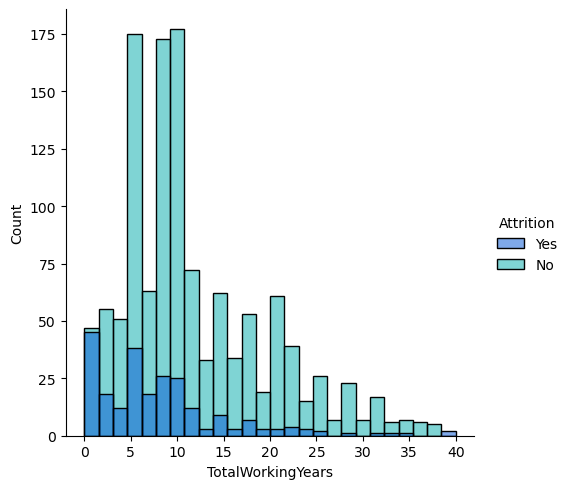

<Figure size 1800x600 with 0 Axes>

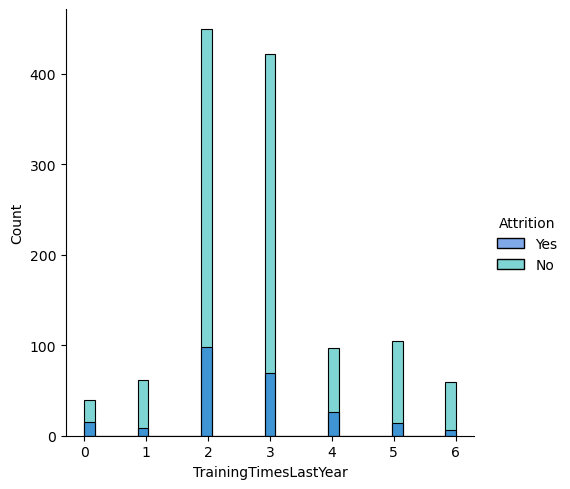

<Figure size 1800x600 with 0 Axes>

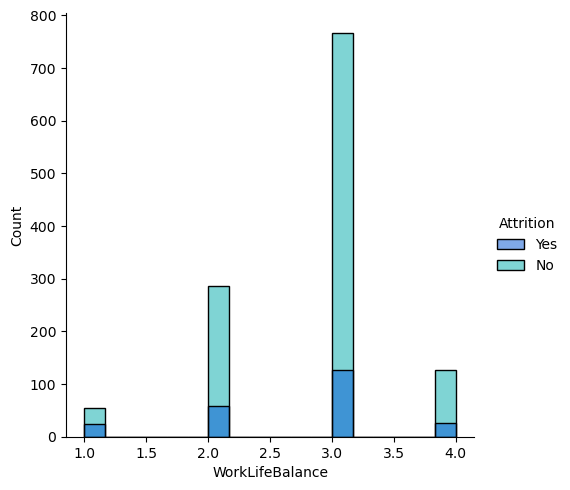

<Figure size 1800x600 with 0 Axes>

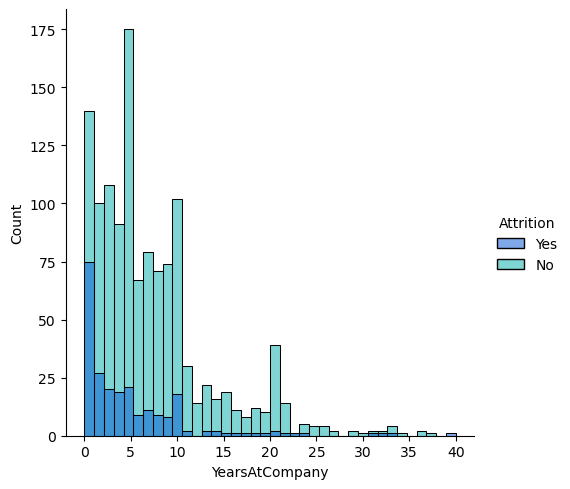

<Figure size 1800x600 with 0 Axes>

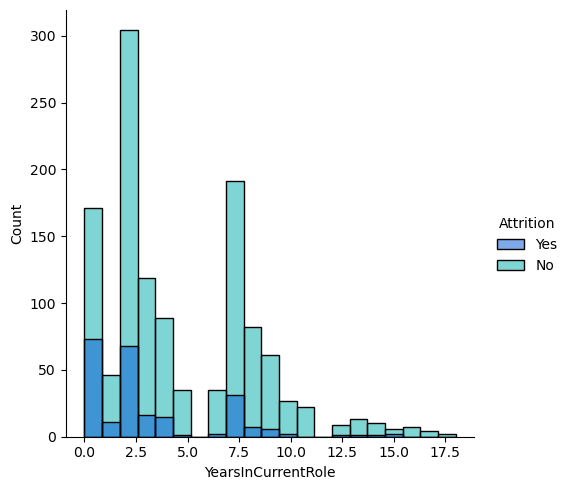

<Figure size 1800x600 with 0 Axes>

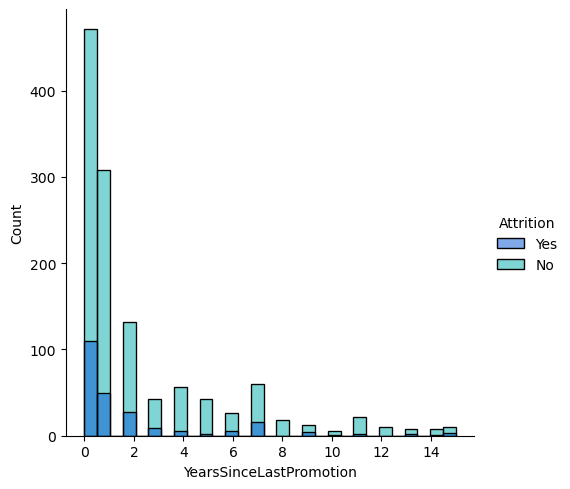

<Figure size 1800x600 with 0 Axes>

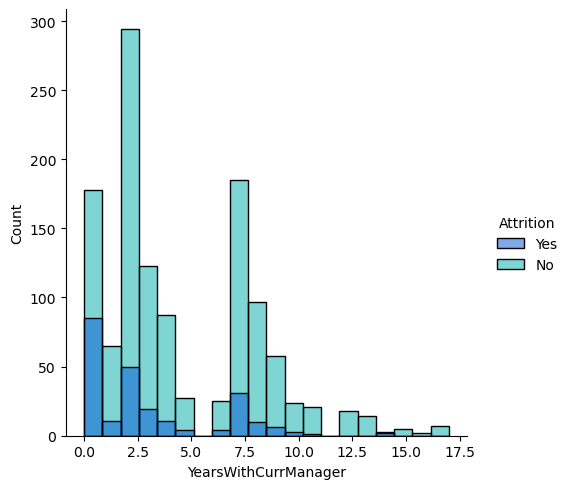

In [20]:
for col in num_cols:
    plt.figure(figsize=(18,6))
    sns.displot(x= col, data=df,palette='winter', hue='Attrition')
    plt.show()

### High Attrition rate
    -Age between 25 to 45
    -Monthly Income is greaterthan <= 2500 and = 10,000
    -NumCompanies Worked is 1
    -Stock Option Level is 0 and 1
    -Total Working Years is 0 to 13 years
    -Years At Company is 0 to 10
    -Years In Current Role = 1 , 2, 7
    -Years Since Last Promotion = 0,1

### No Attrition plot

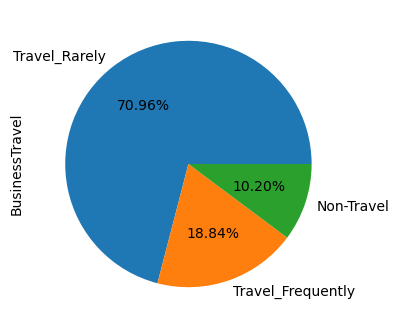

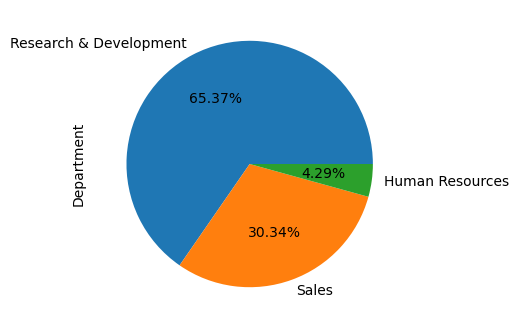

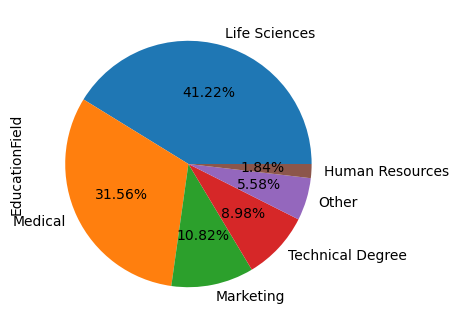

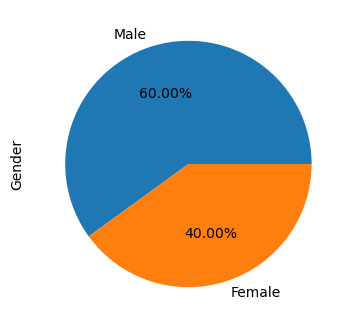

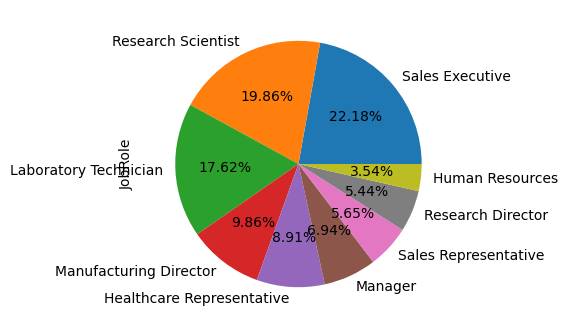

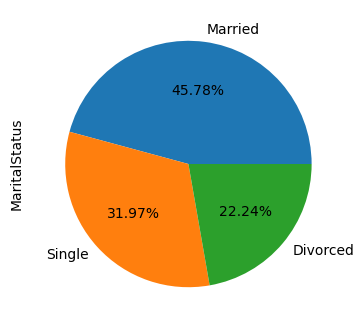

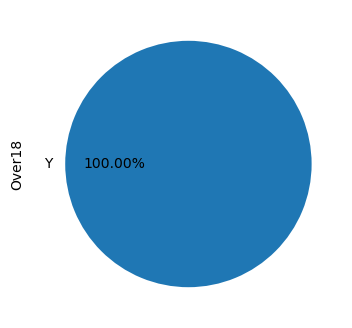

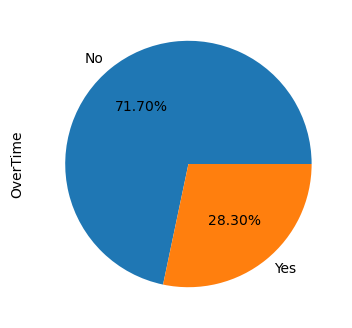

In [29]:
for col in obj_cols:
    plt.figure(figsize=(4,4))
    round(df[col].value_counts()/df.shape[0]*100, 2).plot.pie(autopct="%1.2f%%")
    plt.show()

### Attrition plot

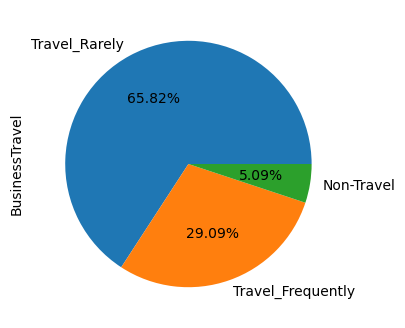

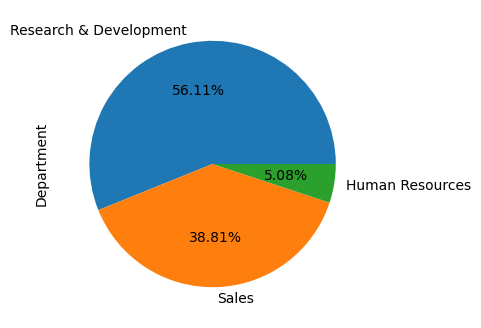

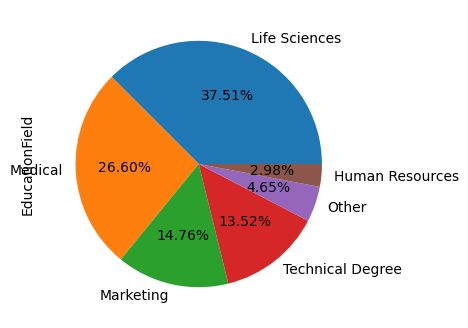

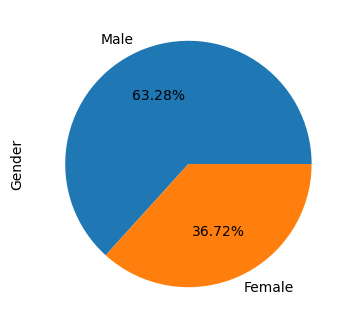

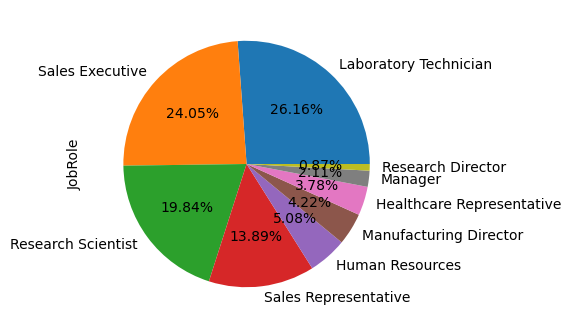

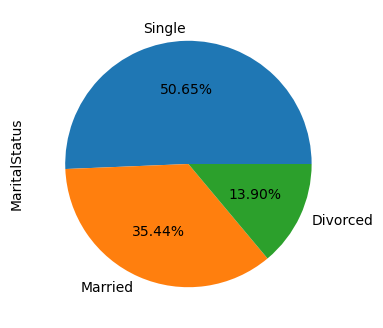

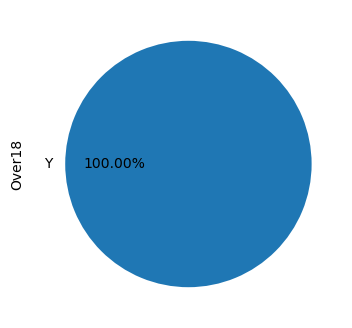

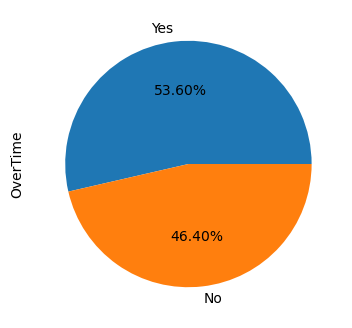

In [40]:
for col in obj_cols:
    plt.figure(figsize=(4,4))
    round(df[(df['Attrition'] == 'Yes')][col].value_counts()/df.shape[0]*100, 2).plot.pie(autopct="%1.2f%%")
    plt.show()

### Checking outliers using boxplot

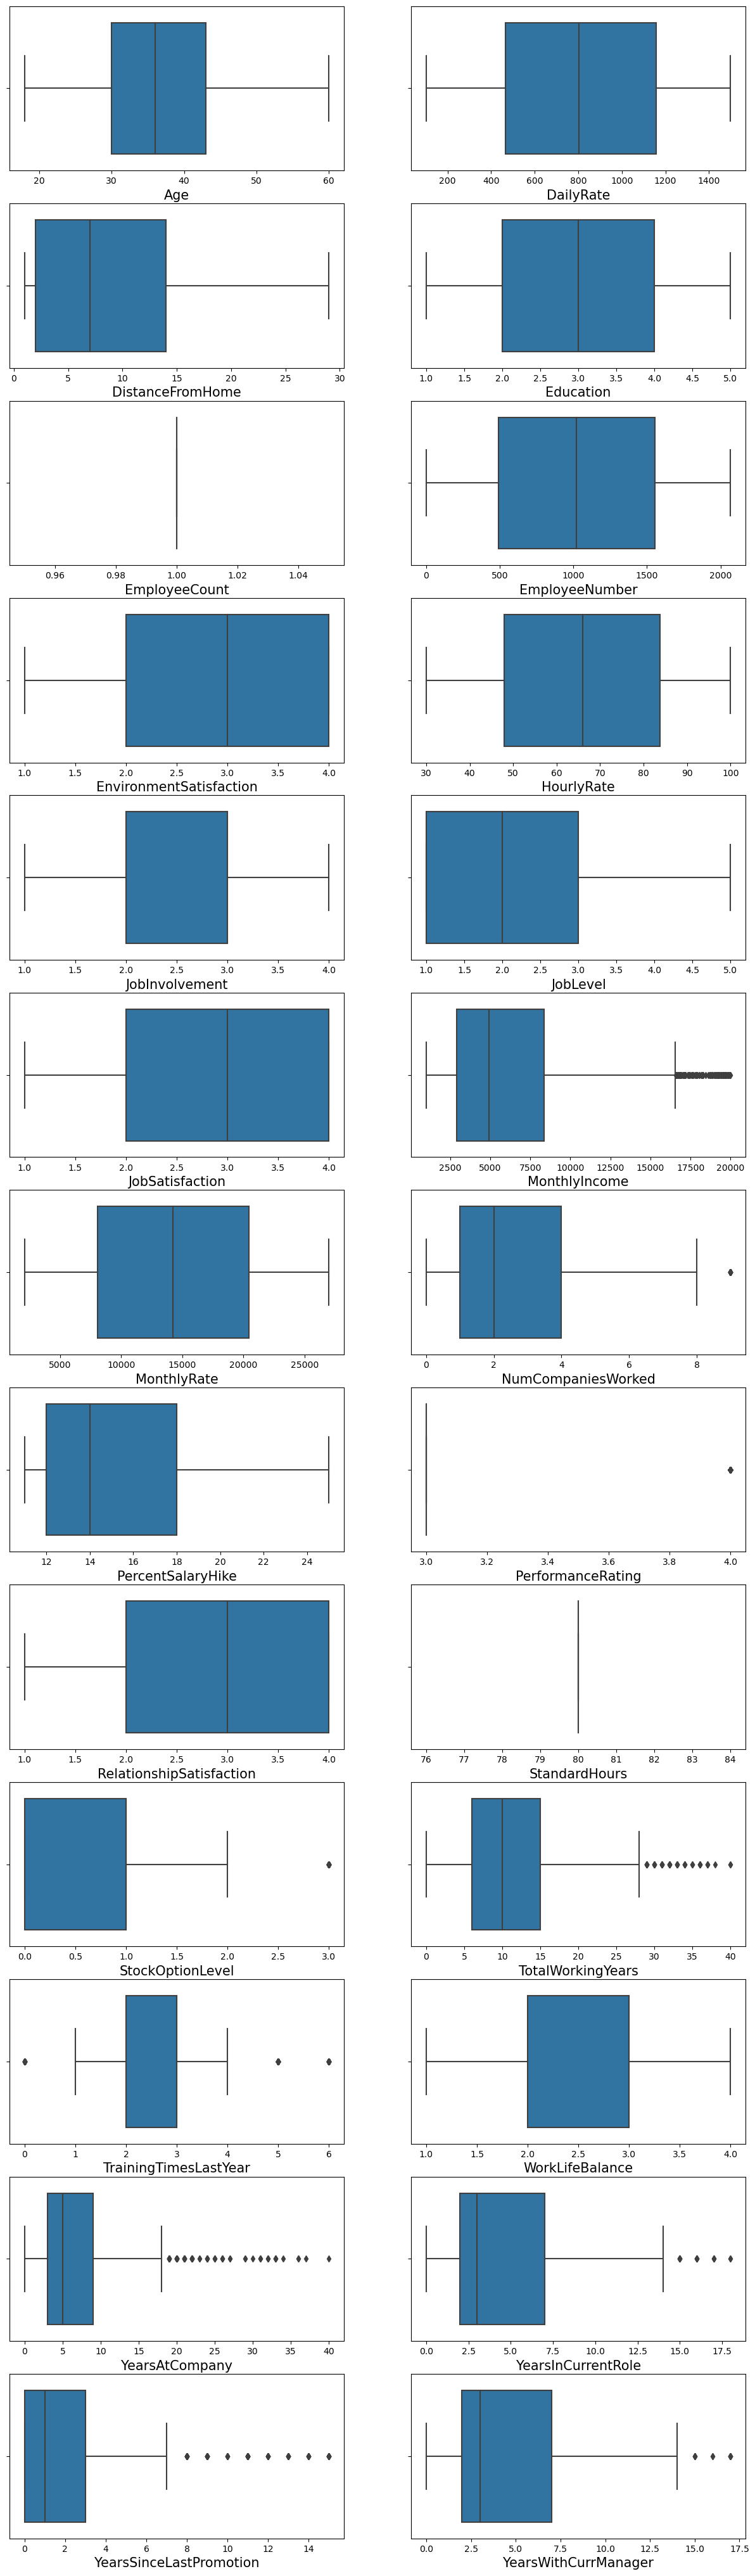

In [55]:
plt.figure(figsize=(15,60))
plotnumber =1

for col in num_cols:
    if plotnumber<=30:
        ax = plt.subplot(15,2,plotnumber)
        sns.boxplot(x=col,data=df)
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show()

Monthly income, Numcompanies worked,total working years,years at company, year in current role, Year since last year Promotion,
year with currrent manager having oultiers. Let's treat one by one.

### Dealing with Outliers

In monthly income boxplot, People having income 16500+ consider as a outliers

In [59]:
(df['MonthlyIncome']<=16500).value_counts()

True     1355
False     115
Name: MonthlyIncome, dtype: int64

In [60]:
df= df[(df['MonthlyIncome']<=16500)]
df.shape

(1355, 35)

NumCompaniesWorked

In [61]:
(df['NumCompaniesWorked']<=8).value_counts()

True     1308
False      47
Name: NumCompaniesWorked, dtype: int64

In [62]:
df= df[(df['NumCompaniesWorked']<=8)]
df.shape

(1308, 35)

TotalWorkingYears

In [63]:
(df['TotalWorkingYears']<=30).value_counts()

True     1289
False      19
Name: TotalWorkingYears, dtype: int64

In [64]:
df= df[(df['TotalWorkingYears']<=30)]
df.shape

(1289, 35)

YearsInCurrentRole

In [67]:
(df['YearsInCurrentRole']<=15).value_counts()

True     1285
False       4
Name: YearsInCurrentRole, dtype: int64

In [68]:
df= df[(df['YearsInCurrentRole']<=15)]
df.shape

(1285, 35)

YearsAtCompany

In [70]:
(df['YearsAtCompany']<=35).value_counts()

True    1285
Name: YearsAtCompany, dtype: int64

There is no outliers present in YearsAtCompany column

YearsSinceLastPromotion

In [71]:
(df['YearsSinceLastPromotion']<=14).value_counts()

True     1281
False       4
Name: YearsSinceLastPromotion, dtype: int64

In [74]:
df= df[(df['YearsSinceLastPromotion']<=14)]
df.shape

(1281, 35)

YearsWithCurrManager

In [75]:
(df['YearsWithCurrManager']<=15).value_counts()

True     1275
False       6
Name: YearsWithCurrManager, dtype: int64

In [77]:
df= df[(df['YearsWithCurrManager']<=15)]
df.shape

(1275, 35)

Around 200 rows were removed while dealing with outliers

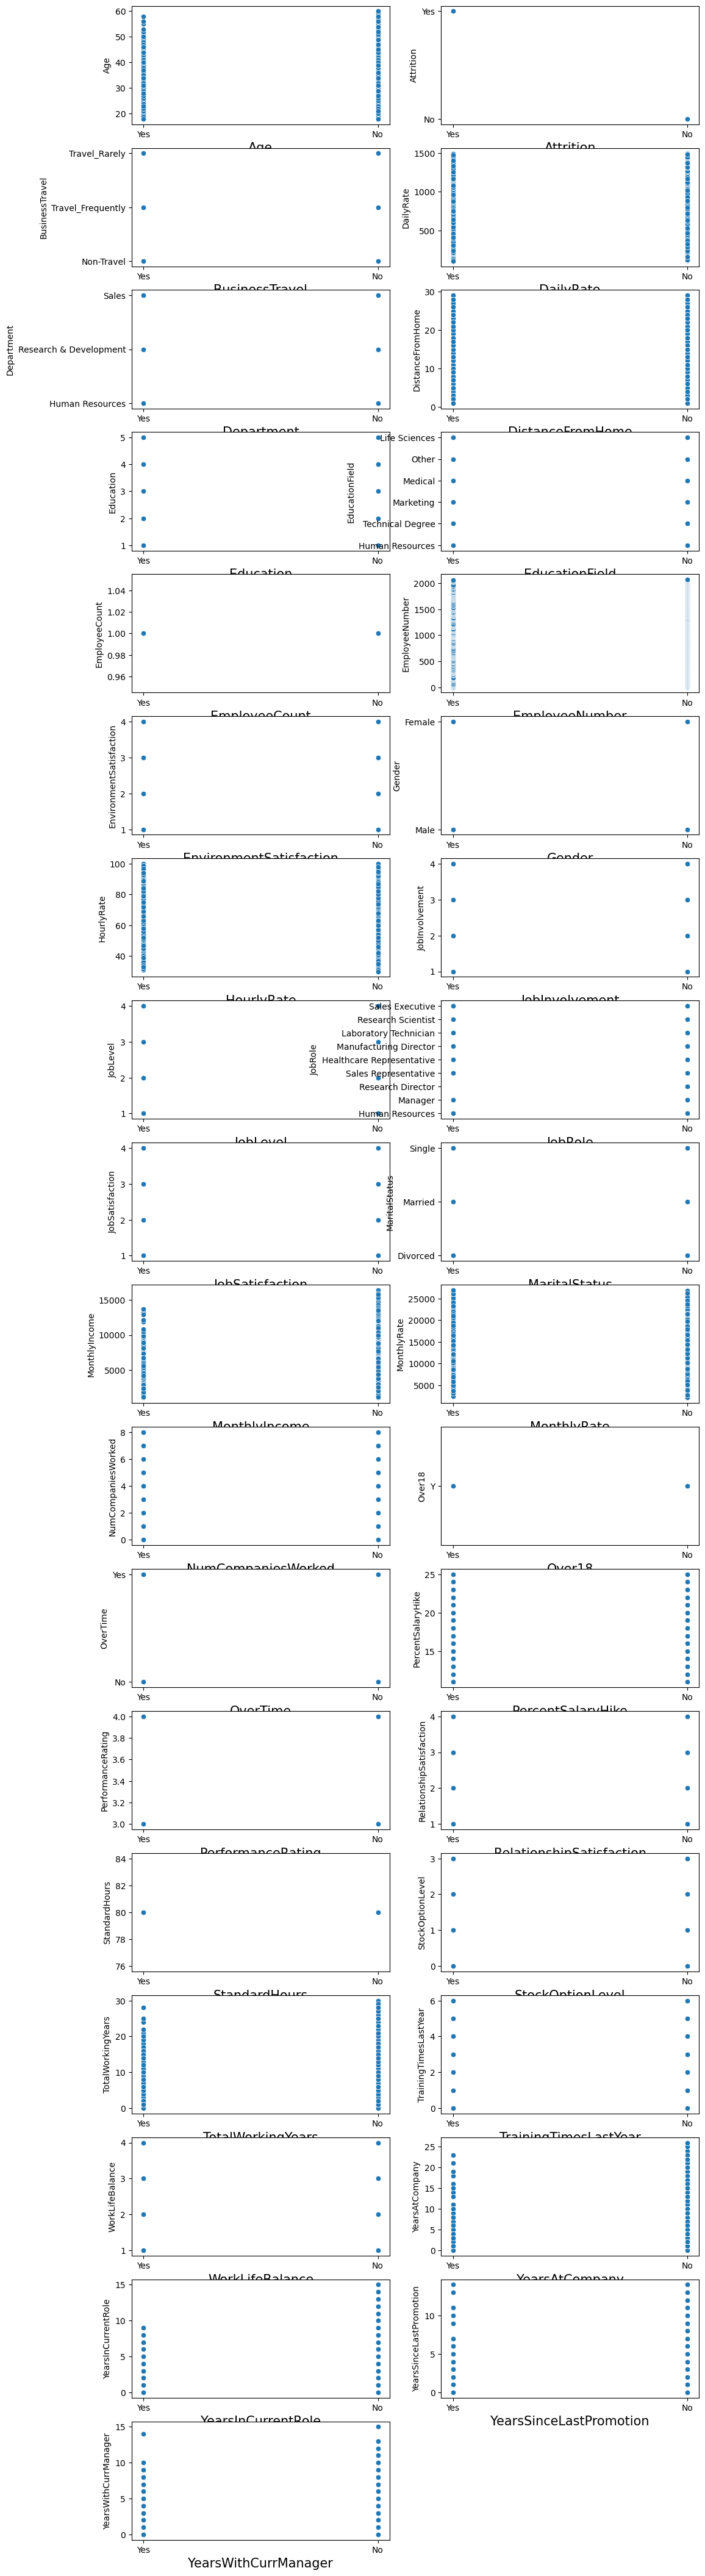

In [109]:
plt.figure(figsize=(12,60))
plotnumber =1
try:
    for column in df:
        if plotnumber<=40:
            ax = plt.subplot(20,2,plotnumber)
            sns.scatterplot(y=df[column], x='Attrition',data=df)
            plt.xlabel(column,fontsize=15)
        plotnumber+=1
    plt.show()
    
except:
    print(" ")

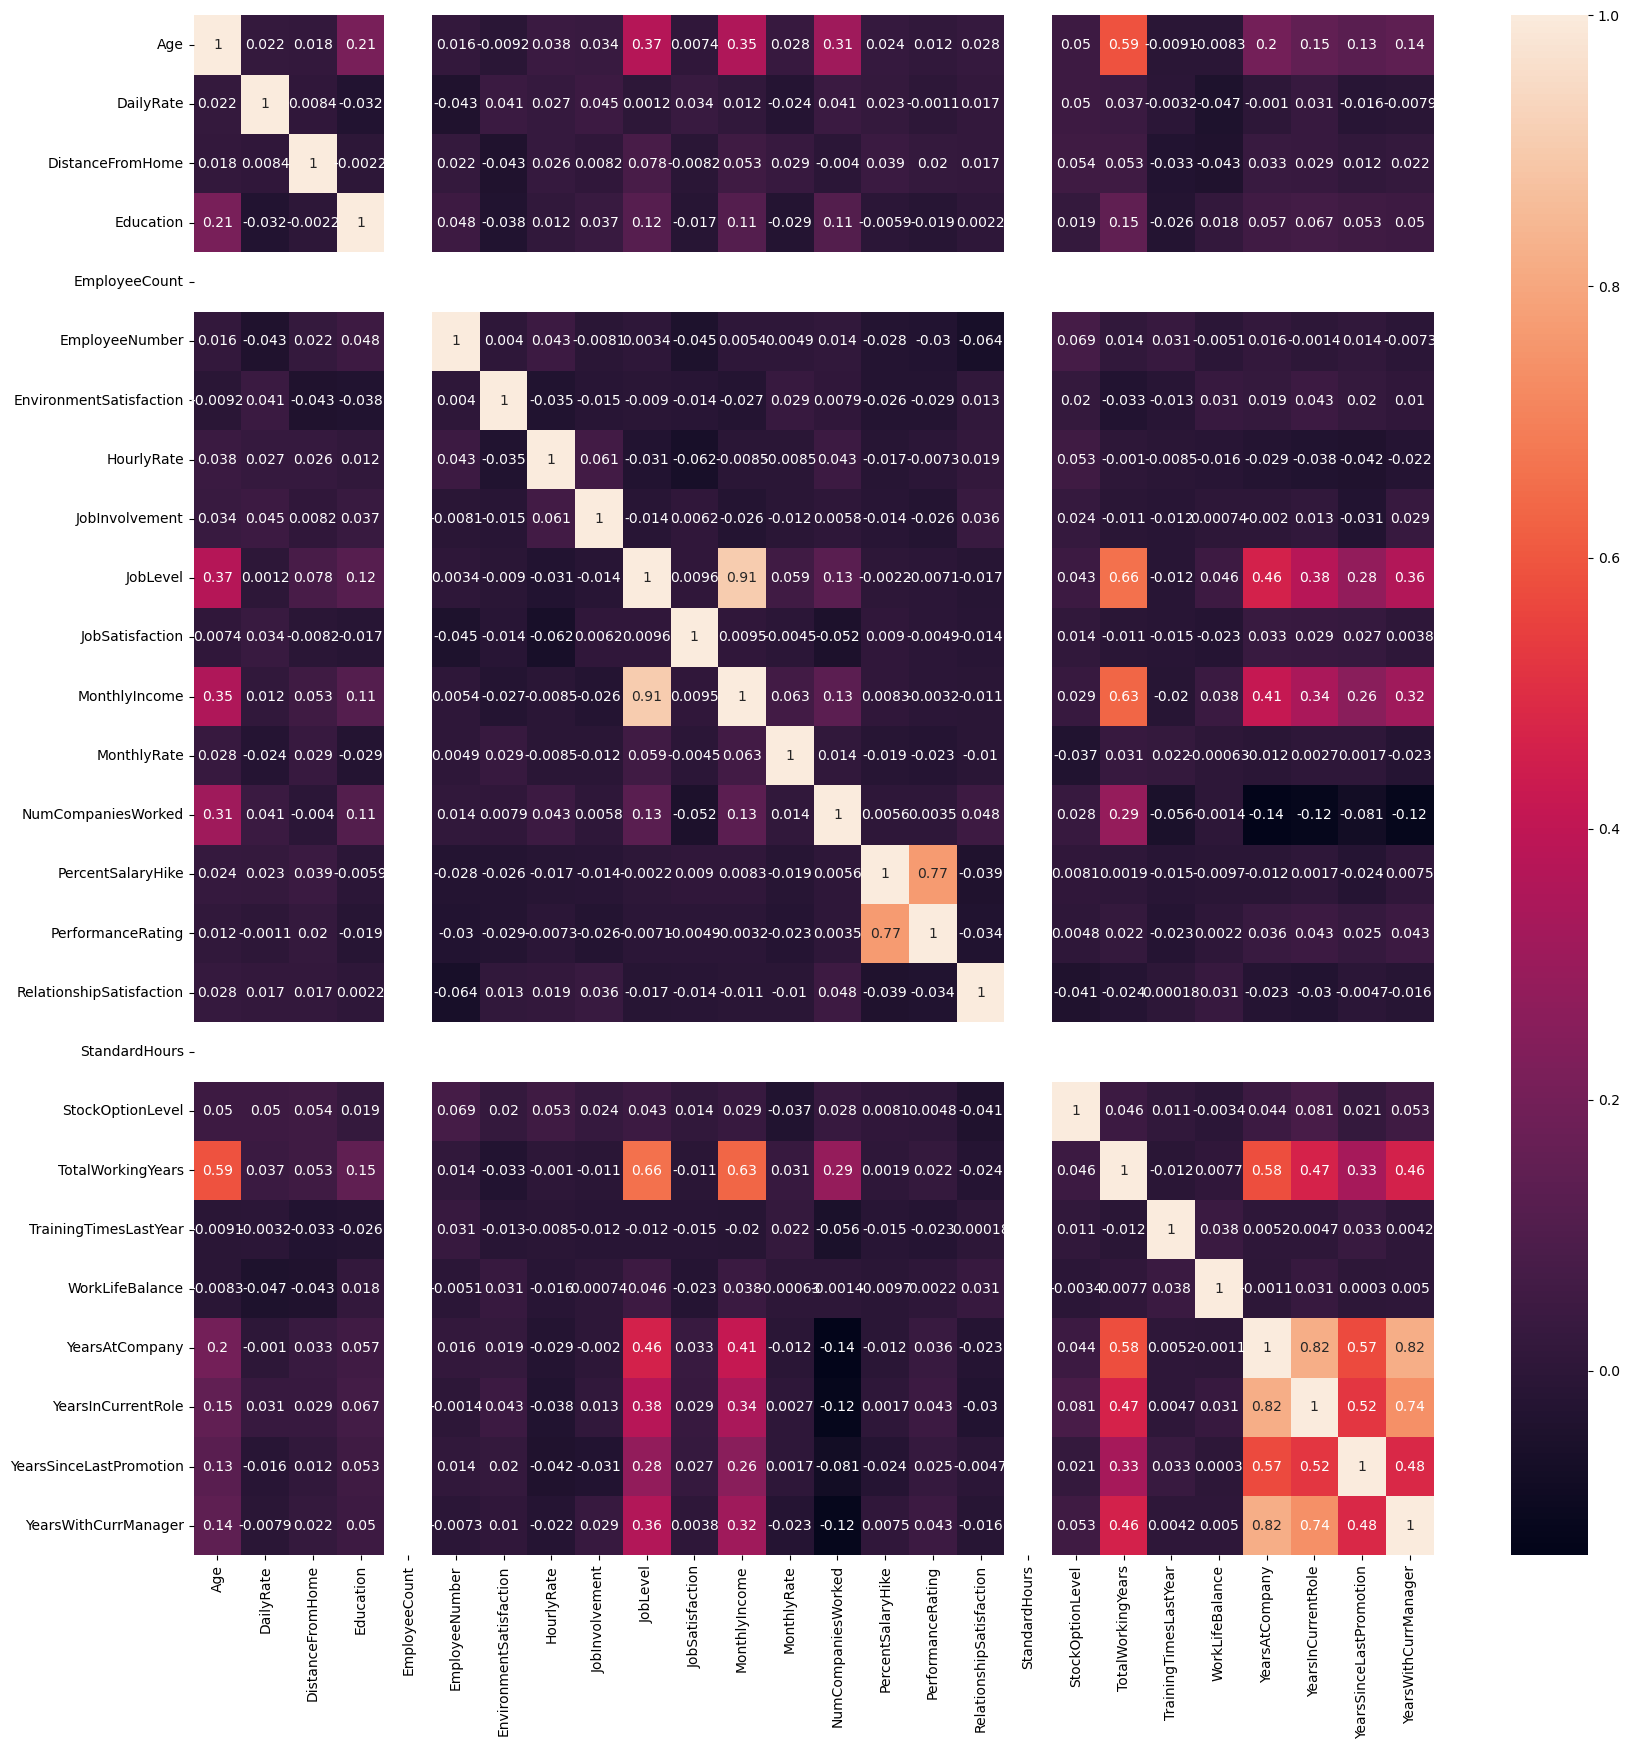

In [126]:
# plotting Heatmap correlation

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':10})
plt.show()

### Encode the categoical values

In [128]:
df_new = df.copy()
df_new.shape

(1275, 35)

In [129]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder 

In [130]:
obj_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [131]:
attrition_lab_en = LabelEncoder()

business_travel_lab_en = LabelEncoder()

department_lab_en = LabelEncoder()

education_field_lab_en = LabelEncoder()

gender_lab_en = LabelEncoder()

job_role_lab_en = LabelEncoder()

marital_status_lab_en = LabelEncoder()

over_lab_en = LabelEncoder()

over_time_lab_en = LabelEncoder()

In [132]:
df_new['Attrition'] = attrition_lab_en.fit_transform(df_new['Attrition'])

df_new['BusinessTravel'] = business_travel_lab_en.fit_transform(df_new['BusinessTravel'])

df_new['Department'] = department_lab_en.fit_transform(df_new['Department'])

df_new['EducationField'] = education_field_lab_en.fit_transform(df_new['EducationField'])

df_new['Gender'] = gender_lab_en.fit_transform(df_new['Gender'])

df_new['JobRole'] = job_role_lab_en.fit_transform(df_new['JobRole'])

df_new['MaritalStatus'] = marital_status_lab_en.fit_transform(df_new['MaritalStatus'])

df_new['Over18'] = over_lab_en.fit_transform(df_new['Over18'])

df_new['OverTime'] = over_time_lab_en.fit_transform(df_new['OverTime'])


### Checking correaltion and feature selection process

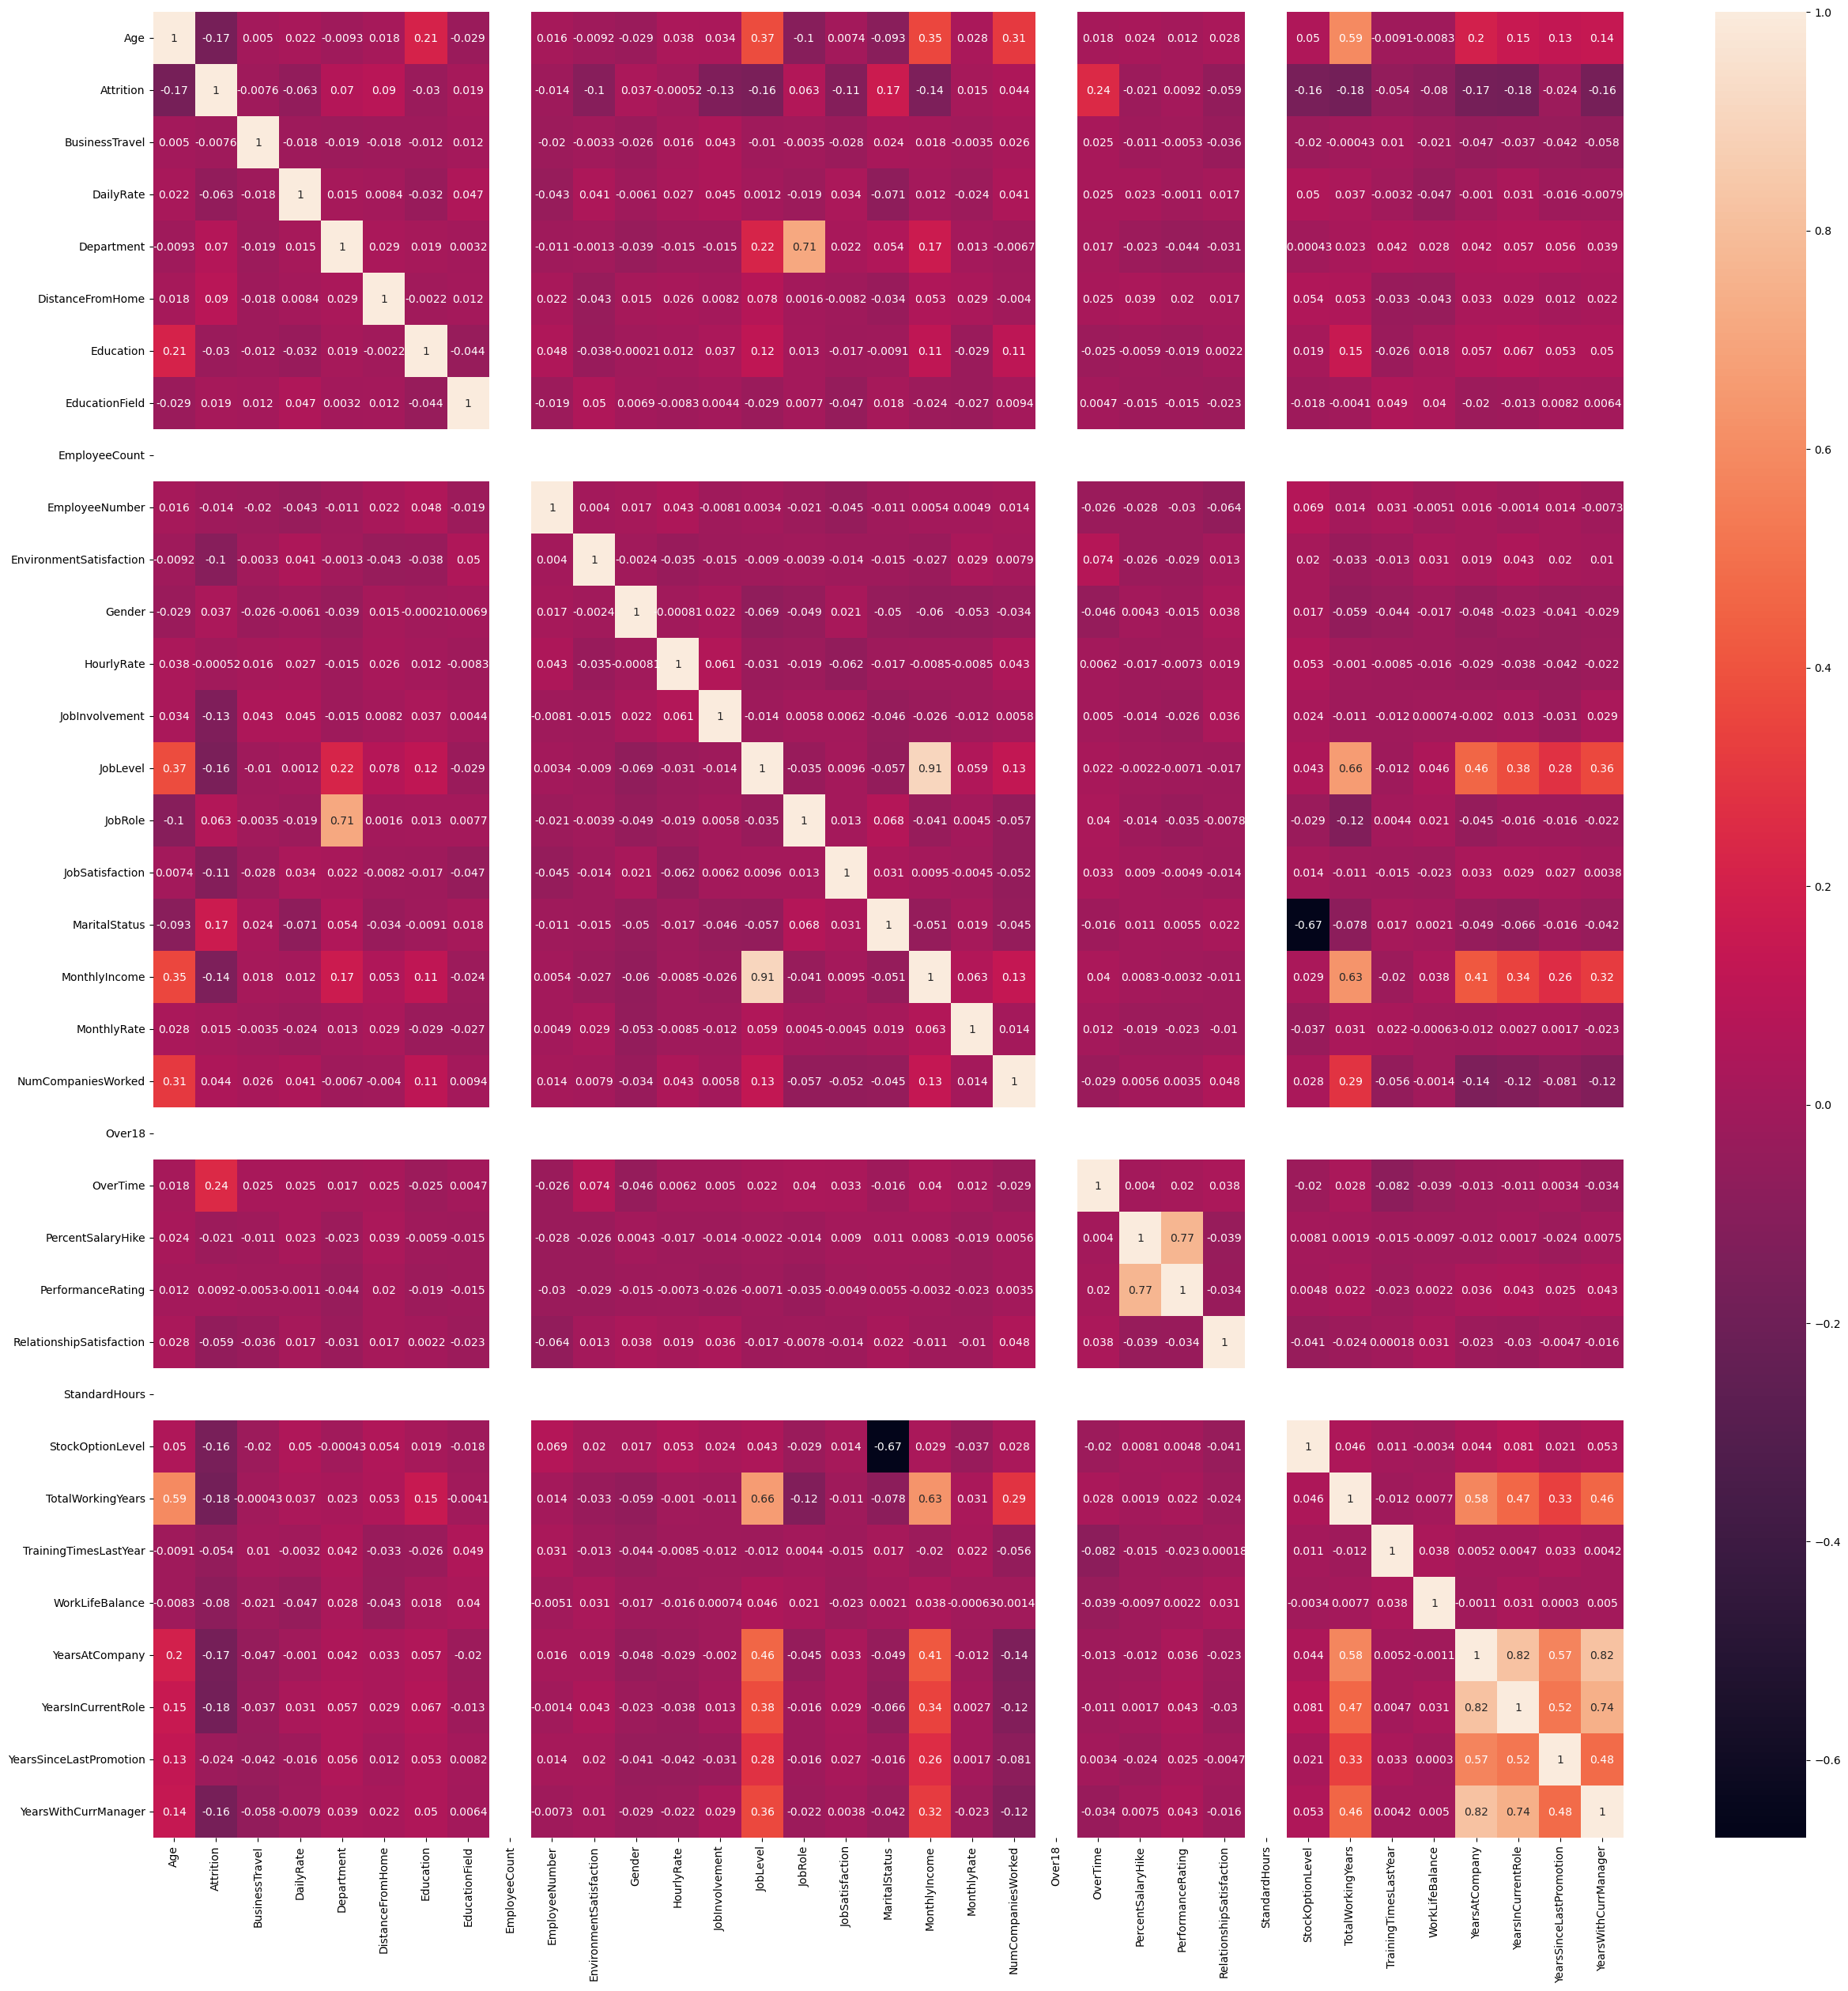

In [134]:
plt.figure(figsize=(30,30))
sns.heatmap(df_new.corr(), annot=True, annot_kws={'size':10})
plt.show()

In [137]:
round(abs(df_new.corr()['Attrition']*100).sort_values(ascending=False), 2)

Attrition                   100.00
OverTime                     24.33
YearsInCurrentRole           18.13
TotalWorkingYears            17.80
YearsAtCompany               17.14
MaritalStatus                16.64
Age                          16.59
YearsWithCurrManager         16.33
StockOptionLevel             16.09
JobLevel                     15.54
MonthlyIncome                14.09
JobInvolvement               13.12
JobSatisfaction              11.22
EnvironmentSatisfaction      10.14
DistanceFromHome              9.04
WorkLifeBalance               8.02
Department                    6.97
JobRole                       6.32
DailyRate                     6.30
RelationshipSatisfaction      5.86
TrainingTimesLastYear         5.36
NumCompaniesWorked            4.38
Gender                        3.73
Education                     3.00
YearsSinceLastPromotion       2.44
PercentSalaryHike             2.07
EducationField                1.88
MonthlyRate                   1.51
EmployeeNumber      

Here I'm rejecting less than 2% of correlation features 

In [140]:
df_new = df_new.drop(['EducationField', 'MonthlyRate', 'EmployeeNumber', 'PerformanceRating',
                      'BusinessTravel','HourlyRate', 'EmployeeCount','Over18', 'StandardHours'], axis=1)
df_new.head()

Age  Attrition  DailyRate  Department  DistanceFromHome  Education  \
0   41          1       1102           2                 1          2   
1   49          0        279           1                 8          1   
2   37          1       1373           1                 2          2   
3   33          0       1392           1                 3          4   
5   32          0       1005           1                 2          2   

   EnvironmentSatisfaction  Gender  JobInvolvement  JobLevel  ...  \
0                        2       0               3         2  ...   
1                        3       1               2         2  ...   
2                        4       1               2         1  ...   
3                        4       0               3         1  ...   
5                        4       1               3         1  ...   

   PercentSalaryHike  RelationshipSatisfaction  StockOptionLevel  \
0                 11                         1                 0   
1                 23                         4                 1   
2                 15                         2                 0   
3                 11                         3                 0   
5                 13                         3                 0   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
5                  8                      2                2               7   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
5                   7                        3                     6  

[5 rows x 26 columns]

### Let's check the data balance 

0    1059
1     216
Name: Attrition, dtype: int64


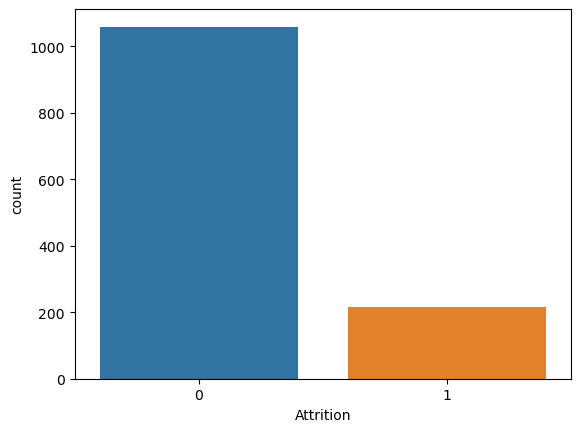

In [142]:
print(df_new['Attrition'].value_counts())

sns.countplot(x='Attrition', data=df_new)
plt.show()

Here our data is imbalanced dataset. For this I'm using Balanced Bagging and Balanced Random Forest Classifier for modeling.

In [143]:
X=df_new.drop('Attrition',axis=1)
y= df_new.Attrition

In [144]:
scalar = StandardScaler()

X_scaler= scalar.fit_transform(X)

In [145]:
x_train,x_test,y_train,y_test= train_test_split(X_scaler, y, test_size=0.25, random_state=42)

In [157]:
#importing ML models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier , BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier

In [198]:
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred= clf.predict(x_train)
        
        print("\n Train Result:")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        pred= clf.predict(x_test)
        
        print("\n Test Result:")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        
        
        print('\n \n Test classification report \n',classification_report(y_test,pred, digits=2))

### Model Accuracy without data balancing

In [150]:
#model training
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [151]:
# for train result 
metric_score(clf,x_train,x_test,y_train,y_test, train=True)

# for test result
metric_score(clf,x_train,x_test,y_train,y_test, train=False)


 Train Result:
Accuracy Score:100.00%

 Test Result:
Accuracy Score:75.55%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       267
           1       0.30      0.37      0.33        52

    accuracy                           0.76       319
   macro avg       0.58      0.60      0.59       319
weighted avg       0.78      0.76      0.77       319



In [161]:
#model training
clf = LogisticRegression()
clf.fit(x_train,y_train)

# for train result 
metric_score(clf,x_train,x_test,y_train,y_test, train=True)

# for test result
metric_score(clf,x_train,x_test,y_train,y_test, train=False)


 Train Result:
Accuracy Score:87.24%

 Test Result:
Accuracy Score:87.77%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       267
           1       0.70      0.44      0.54        52

    accuracy                           0.88       319
   macro avg       0.80      0.70      0.74       319
weighted avg       0.87      0.88      0.87       319



In [162]:
#model training
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# for train result 
metric_score(clf,x_train,x_test,y_train,y_test, train=True)

# for test result
metric_score(clf,x_train,x_test,y_train,y_test, train=False)


 Train Result:
Accuracy Score:100.00%

 Test Result:
Accuracy Score:84.95%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       267
           1       0.62      0.19      0.29        52

    accuracy                           0.85       319
   macro avg       0.74      0.58      0.60       319
weighted avg       0.82      0.85      0.81       319



In [163]:
#model training
clf = GradientBoostingClassifier()
clf.fit(x_train,y_train)

# for train result 
metric_score(clf,x_train,x_test,y_train,y_test, train=True)

# for test result
metric_score(clf,x_train,x_test,y_train,y_test, train=False)


 Train Result:
Accuracy Score:95.61%

 Test Result:
Accuracy Score:86.21%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       267
           1       0.62      0.38      0.48        52

    accuracy                           0.86       319
   macro avg       0.76      0.67      0.70       319
weighted avg       0.85      0.86      0.85       319



In [164]:
#model training
clf = SVC()
clf.fit(x_train,y_train)

# for train result 
metric_score(clf,x_train,x_test,y_train,y_test, train=True)

# for test result
metric_score(clf,x_train,x_test,y_train,y_test, train=False)


 Train Result:
Accuracy Score:91.32%

 Test Result:
Accuracy Score:86.21%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       267
           1       0.72      0.25      0.37        52

    accuracy                           0.86       319
   macro avg       0.80      0.62      0.65       319
weighted avg       0.85      0.86      0.83       319



In [165]:
#model training
clf = KNeighborsClassifier()
clf.fit(x_train,y_train)

# for train result 
metric_score(clf,x_train,x_test,y_train,y_test, train=True)

# for test result
metric_score(clf,x_train,x_test,y_train,y_test, train=False)


 Train Result:
Accuracy Score:86.92%

 Test Result:
Accuracy Score:84.33%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       267
           1       0.56      0.17      0.26        52

    accuracy                           0.84       319
   macro avg       0.71      0.57      0.59       319
weighted avg       0.81      0.84      0.81       319



In [166]:
#model training
clf = xgb.XGBClassifier()
clf.fit(x_train,y_train)

# for train result 
metric_score(clf,x_train,x_test,y_train,y_test, train=True)

# for test result
metric_score(clf,x_train,x_test,y_train,y_test, train=False)


 Train Result:
Accuracy Score:100.00%

 Test Result:
Accuracy Score:85.27%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       267
           1       0.57      0.40      0.47        52

    accuracy                           0.85       319
   macro avg       0.73      0.67      0.69       319
weighted avg       0.84      0.85      0.84       319



In [156]:
#model training
clf = BaggingClassifier()
clf.fit(x_train,y_train)

# for train result 
metric_score(clf,x_train,x_test,y_train,y_test, train=True)

# for test result
metric_score(clf,x_train,x_test,y_train,y_test, train=False)


 Train Result:
Accuracy Score:98.85%

 Test Result:
Accuracy Score:83.39%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       267
           1       0.48      0.19      0.27        52

    accuracy                           0.83       319
   macro avg       0.67      0.58      0.59       319
weighted avg       0.80      0.83      0.80       319



### Model Accuracy with data balancing

In [160]:
#model training
clf = BalancedBaggingClassifier()
clf.fit(x_train,y_train)

# for train result 
metric_score(clf,x_train,x_test,y_train,y_test, train=True)

# for test result
metric_score(clf,x_train,x_test,y_train,y_test, train=False)


 Train Result:
Accuracy Score:93.41%

 Test Result:
Accuracy Score:78.37%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       267
           1       0.37      0.44      0.40        52

    accuracy                           0.78       319
   macro avg       0.63      0.65      0.63       319
weighted avg       0.80      0.78      0.79       319



In [159]:
#model training
clf = BalancedRandomForestClassifier()
clf.fit(x_train,y_train)

# for train result 
metric_score(clf,x_train,x_test,y_train,y_test, train=True)

# for test result
metric_score(clf,x_train,x_test,y_train,y_test, train=False)


 Train Result:
Accuracy Score:89.23%

 Test Result:
Accuracy Score:72.10%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.92      0.73      0.81       267
           1       0.33      0.69      0.45        52

    accuracy                           0.72       319
   macro avg       0.63      0.71      0.63       319
weighted avg       0.83      0.72      0.75       319



In [175]:
#model training
clf = BalancedBaggingClassifier(base_estimator=SVC())
clf.fit(x_train,y_train)

# for train result 
metric_score(clf,x_train,x_test,y_train,y_test, train=True)

# for test result
metric_score(clf,x_train,x_test,y_train,y_test, train=False)


 Train Result:
Accuracy Score:87.45%

 Test Result:
Accuracy Score:80.25%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       267
           1       0.43      0.63      0.51        52

    accuracy                           0.80       319
   macro avg       0.68      0.73      0.69       319
weighted avg       0.84      0.80      0.82       319



In [179]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

In [180]:
grid_search= GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [181]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.828 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.832 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.827 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.827 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.827 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.828 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.832 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.827 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.827 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.827 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.828 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [182]:
best_para=grid_search.best_params_
best_para

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [183]:
#model training
clf = BalancedBaggingClassifier(base_estimator=SVC(C= 10, gamma=0.01,kernel='rbf'))
clf.fit(x_train,y_train)

# for train result 
metric_score(clf,x_train,x_test,y_train,y_test, train=True)

# for test result
metric_score(clf,x_train,x_test,y_train,y_test, train=False)


 Train Result:
Accuracy Score:85.88%

 Test Result:
Accuracy Score:79.31%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.92      0.83      0.87       267
           1       0.41      0.62      0.49        52

    accuracy                           0.79       319
   macro avg       0.66      0.72      0.68       319
weighted avg       0.83      0.79      0.81       319



### ROC AUC cruve without balancig data

In [ ]:
lr= LogisticRegression()
rm= RandomForestClassifier()
gb= GradientBoostingClassifier()
knn= KNeighborsClassifier()
dt =DecisionTreeClassifier()
sv= SVC()
xgb= xgb.XGBClassifier()

lr.fit(x_train, y_train)
rm.fit(x_train, y_train)
knn.fit(x_train, y_train)
dt.fit(x_train, y_train)
xgb.fit(x_train, y_train)
sv.fit(x_train, y_train)
gb.fit(x_train, y_train)

print('All model are trained.')

lr.score(x_test, y_test)
dt.score(x_test, y_test)
rm.score(x_test, y_test)
knn.score(x_test, y_test)
xgb.score(x_test, y_test)
sv.score(x_test, y_test)
gb.score(x_test, y_test)


print("Test Score are stored.")

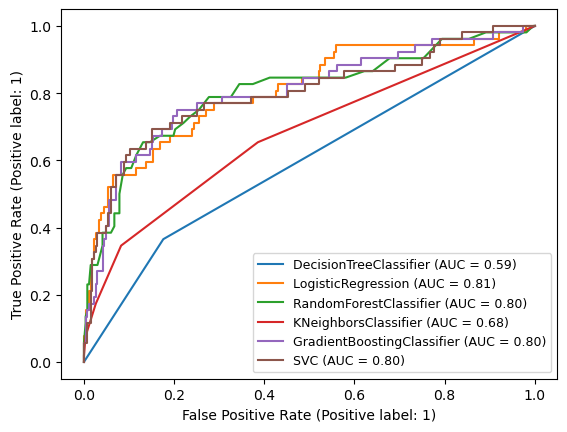

In [185]:
# ROC AUC curve on test data for all models

dis =plot_roc_curve(dt,x_test,y_test)

plot_roc_curve(lr,x_test,y_test, ax=dis.ax_)
plot_roc_curve(rm,x_test,y_test, ax=dis.ax_)
plot_roc_curve(knn,x_test,y_test, ax=dis.ax_)
plot_roc_curve(gb,x_test,y_test, ax=dis.ax_)
plot_roc_curve(sv,x_test,y_test, ax=dis.ax_)

plt.legend(prop={'size':9}, loc='lower right')

plt.show()

### ROC AUC for balanced data

In [187]:
bbc= BalancedBaggingClassifier(base_estimator=SVC())
brc=BalancedRandomForestClassifier()


bbc.fit(x_train, y_train)
brc.fit(x_train, y_train)

bbc.score(x_test, y_test)
brc.score(x_test, y_test)


0.7398119122257053

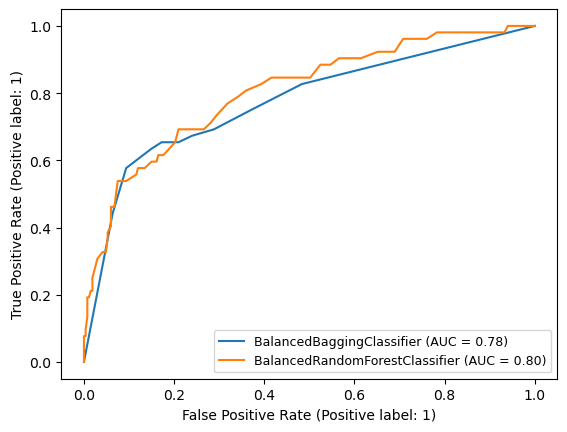

In [188]:

dis =plot_roc_curve(bbc,x_test,y_test)

plot_roc_curve(brc,x_test,y_test, ax=dis.ax_)

plt.legend(prop={'size':9}, loc='lower right')

plt.show()

In [207]:
y_pred=bbc.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

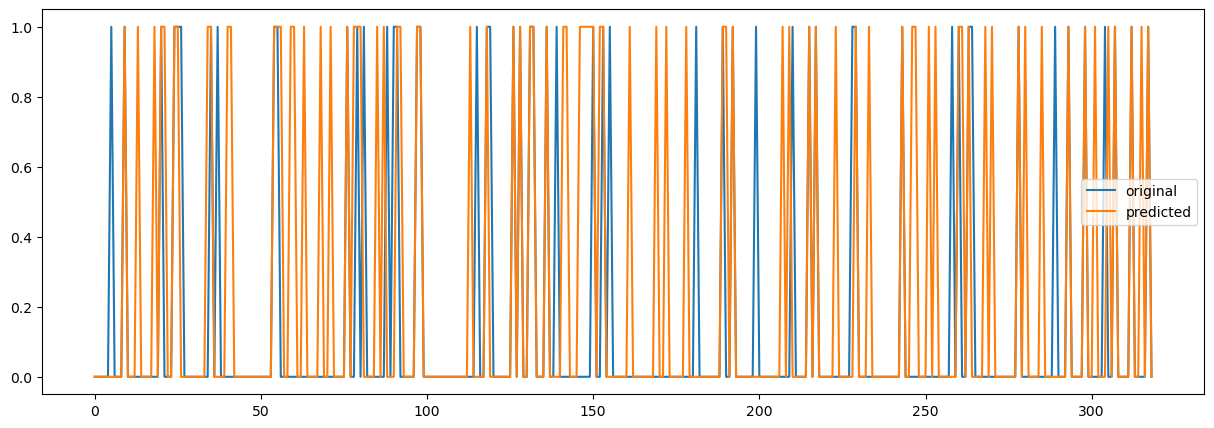

In [206]:
x_ax = range(len(y_test))
plt.figure(figsize=(15,5))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.legend()
plt.show()

In [189]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(bbc,x_test,y_test, cv=10, scoring='accuracy'))

[0.75       0.75       0.75       0.84375    0.84375    0.875
 0.84375    0.84375    0.84375    0.87096774]


In [193]:
import pickle
pickle.dump(bbc, open('HR_Analytics_Project.pkl', 'wb'))

In [194]:
pickled_model = pickle.load(open('HR_Analytics_Project.pkl', 'rb'))
pickled_model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

## Conclusion

## Arround 80% accuracy with SVM with data balancing and arround 87% accuracy with Logistic Regression without data balancing